## Basic setup: import libraries and dataset

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Dataset is available on UCI Machine Learning Repository
# https://archive-beta.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

df = pd.read_csv('/content/drive/MyDrive/online_shoppers_intention.csv')

## Data Exploration

In [ ]:
df.head(10)

# each row captures session information for a unique user over a year 
# there are 8 categorical attributes which need to be encoded
# all other numerical attributes look good

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [ ]:
df.describe()

# average duration on product related pages is lower than admin related pages, which is not ideal for any business
# bounce rate and exit rate are low, which is good (means the likelihood of a user leaving the site on the page they came in and 
# the likelihood they left the site on the same pages across sessions are low)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
df.info()

# there are no missing values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
# checking unique values in each column
for col in df:
    print(df[col].unique())

# no data is available for January or April

[ 0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 24 22 21 20
 23 27 26]
[  0.         53.         64.6       ... 167.9107143 305.125
 150.3571429]
[ 0  1  2  4 16  5  3 14  6 12  7  9 10  8 11 24 13]
[  0.   120.    16.   ... 547.75 368.25 211.25]
[  1   2  10  19   0   3  16   7   6  23  13  20   8   5  32   4  45  14
  52   9  46  15  22  11  12  36  42  27  90  18  38  17 128  25  30  21
  51  26  28  31  24  50  96  49  68  98  67  55  35  37  29  34  71  63
  87  40  33  54  64  75  39 111  81  61  47  44  88 149  41  79  66  43
 258  80  62  83 173  48  58  57  56  69  82  59 109 287  53  84  78 137
 113  89  65  60 104 129  77  74  93  76  72 194 140 110 132 115  73 328
 160  86 150  95 130 151 117 124 127 125 116 105  92 157 154 220 187 112
 131 159  94 204 142 206 102 313 145  85  97 198 181 126 106 101 108 119
  70 122  91 276 100 291 114 172 217 141 133 156 136 180 135 195  99 362
 179 118 175 148 440 103 178 184 705 134 176 146 189 120 193 222 121 107
 305 199 4

In [ ]:
# make a copy of the original dataframe
shoppers = df.copy()

# replace boolean values with binary values
shoppers[['Weekend', 'Revenue']] = shoppers[['Weekend','Revenue']].replace({True:1, False:0})
shoppers.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


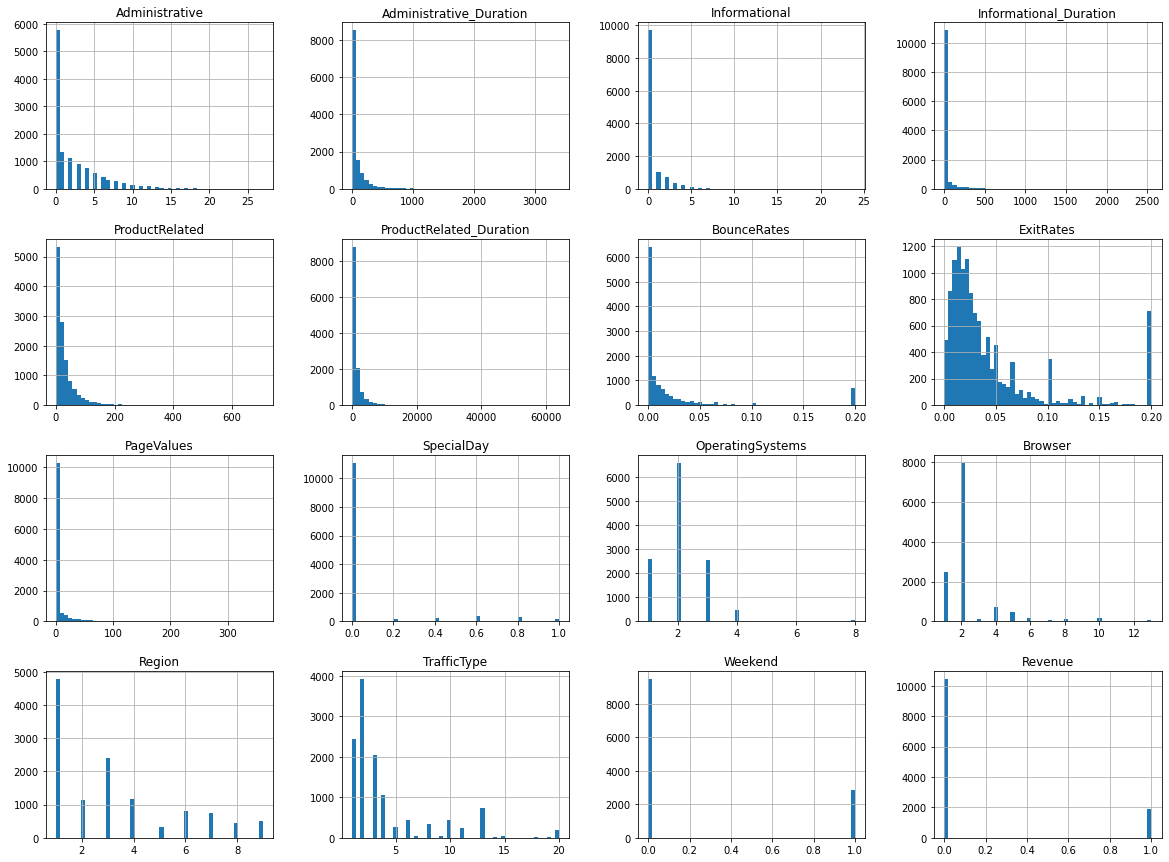

In [ ]:
%matplotlib inline

shoppers.hist(bins=50, figsize=(20,15))
plt.show()

# heavy class imbalance in the target feature, as well as some other features

In [ ]:
corr_matrix = shoppers.corr()
corr_matrix["Revenue"].sort_values(ascending=False)

# PageValues is a good predictor of revenue, with other page related info following closely behind

Revenue                    1.000000
PageValues                 0.492569
ProductRelated             0.158538
ProductRelated_Duration    0.152373
Administrative             0.138917
Informational              0.095200
Administrative_Duration    0.093587
Informational_Duration     0.070345
Weekend                    0.029295
Browser                    0.023984
TrafficType               -0.005113
Region                    -0.011595
OperatingSystems          -0.014668
SpecialDay                -0.082305
BounceRates               -0.150673
ExitRates                 -0.207071
Name: Revenue, dtype: float64

## Data Pre-processing

In [ ]:
# separate target attribute
X = shoppers.drop('Revenue', axis=1)
Y = shoppers['Revenue']

# store numerical and categorical attributes separately for independent pre-processing
shoppers_num = X.drop(X.columns[[10, 11, 12, 13, 14, 15]], axis=1)
shoppers_cat = X[['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType']]

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# normalize numerical values
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

from sklearn.compose import ColumnTransformer

# get the column names
num_attribs = list(shoppers_num)
cat_attribs = list(shoppers_cat.columns.values)

# apply transformation to numerical and categorical attributes
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs), # normalization of numerical attributes
    ("cat", OneHotEncoder(), cat_attribs)], # one-hot encoding of categorical values
    sparse_threshold=0)

shoppers_prepared = full_pipeline.fit_transform(X)

# check the number of features
shoppers_prepared.shape

#number of non-target features increased from 17 --> 74 as a result of one-hot encoding

(12330, 74)

### Split train and test data

In [ ]:
from sklearn.model_selection import train_test_split

# split test and train data (80% vs 20%) and use stratified sampling relative to target class
# to ensure class imbalance of target attribute is carried over to train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(shoppers_prepared, Y, test_size = 0.2, random_state=14, stratify=Y)

In [ ]:
print(X_train.shape[0])
print(len(Y_train))

#there is class imbalance with significantly more values belonging to the negative class (0) than the positve class
pd.value_counts(Y_train)

9864
9864


0    8338
1    1526
Name: Revenue, dtype: int64

In [ ]:
# use randomized oversampling to address class imbalance
# this results in possible over-fitting which will be checked in later steps
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=14)
X_train, Y_train = ros.fit_resample(X_train,Y_train)

## Evaluate performance of all models without any hyperparameter tuning

Models evaluated:
- Decision Tree
- Random forest
- K-nearest neighbor
- Naive Bayes classifier
- Gradient Boosting
- XGBoost

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

# evaluation metrics to consider
scoring = {"accuracy": 'accuracy', "precision": 'precision', "recall": 'recall', "f1": 'f1', "roc_auc": 'roc_auc'}

# training DecisionTreeClassifier using training dataset and evaluating results
dt_clf_init = DecisionTreeClassifier(random_state=14)
dt_clf_init.fit(X_train, Y_train)

def display_scores(scores):
  print("Mean accuracy:", scores["test_accuracy"].mean())
  print("Standard deviation:",  scores["test_accuracy"].std())
  print("Mean precision:", scores["test_precision"].mean())
  print("Standard deviation:", scores["test_precision"].std())
  print("Mean recall:", scores["test_recall"].mean())
  print("Standard deviation:", scores["test_recall"].std())
  print("Mean f1:", scores["test_f1"].mean())
  print("Standard deviation:", scores["test_f1"].std())
  print("Mean ROC AUC:", scores["test_roc_auc"].mean())
  print("Standard deviation:", scores["test_roc_auc"].std())

# evaluation of model using 5-fold cross-validation
dt_scores = cross_validate(dt_clf_init, X_train, Y_train, scoring=scoring, cv=5)
display_scores(dt_scores)

# the scores show signs overfitting -- evaluation metrics are very high with low standard deviation

Mean accuracy: 0.9536464321795937
Standard deviation: 0.005571626884123334
Mean precision: 0.9158674018194033
Standard deviation: 0.00852228734022888
Mean recall: 0.9991606714628297
Standard deviation: 0.0016786570743405173
Mean f1: 0.9556860263386191
Standard deviation: 0.005149026719216673
Mean ROC AUC: 0.9536462491674327
Standard deviation: 0.005572627884483269


### Random Forest Classifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf_init = RandomForestClassifier(random_state=14)
rnd_clf_init.fit(X_train, Y_train)

rf_scores = cross_validate(rnd_clf_init, X_train, Y_train, scoring=scoring, cv=5)
display_scores(rf_scores)

Mean accuracy: 0.9676182592157158
Standard deviation: 0.003091564313176239
Mean precision: 0.9396992613596401
Standard deviation: 0.005233479882882434
Mean recall: 0.999400479616307
Standard deviation: 0.0011990407673860837
Mean f1: 0.968623530073905
Standard deviation: 0.0029209866375291375
Mean ROC AUC: 0.9995810481771287
Standard deviation: 0.00038279228563198146


### K-nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import math

# general rule for finding optimal K value is sqrt(number_of_rows)/2
# print(math.sqrt(len(df))/2)
# returns 56 so set n_neighbors to 56

knn_clf_init = KNeighborsClassifier(n_neighbors=56)
knn_clf_init.fit(X_train,Y_train)

knn_scores = cross_validate(knn_clf_init, X_train, Y_train, scoring=scoring, cv=5)
display_scores(knn_scores)

Mean accuracy: 0.7920960742650258
Standard deviation: 0.00515370973510789
Mean precision: 0.808644788979929
Standard deviation: 0.010076151372276068
Mean recall: 0.7655304910240973
Standard deviation: 0.0037851159200541105
Mean f1: 0.7864465859402318
Standard deviation: 0.0038441004947236887
Mean ROC AUC: 0.8814885808701654
Standard deviation: 0.0067145289777834


### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_clf_init = GaussianNB()
nb_clf_init.fit(X_train, Y_train)

nb_scores = cross_validate(nb_clf_init, X_train, Y_train, scoring=scoring, cv=5)
display_scores(nb_scores)

Mean accuracy: 0.5687215744645663
Standard deviation: 0.007098582107706576
Mean precision: 0.5376004266126991
Standard deviation: 0.004260296151058134
Mean recall: 0.9835698327960307
Standard deviation: 0.003894382145290687
Mean f1: 0.6951944519802761
Standard deviation: 0.003220054898879495
Mean ROC AUC: 0.7655011788301899
Standard deviation: 0.012231495344395753


### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf_init = GradientBoostingClassifier(random_state=14)
gb_clf_init.fit(X_train, Y_train)

gb_scores = cross_validate(gb_clf_init, X_train, Y_train, scoring=scoring, cv=5)
display_scores(gb_scores)

Mean accuracy: 0.8724514181758041
Standard deviation: 0.004079096108632303
Mean precision: 0.8697696346949643
Standard deviation: 0.008621143592303876
Mean recall: 0.8762287110923138
Standard deviation: 0.003934105945829425
Mean f1: 0.8729485803467917
Standard deviation: 0.0033861315535568355
Mean ROC AUC: 0.9458060815678764
Standard deviation: 0.0035725268719318587


### XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb_clf_init = XGBClassifier(random_state=14)
xgb_clf_init.fit(X_train, Y_train)

xgb_scores = cross_validate(xgb_clf_init, X_train, Y_train, scoring=scoring, cv=5)
display_scores(xgb_scores)

Mean accuracy: 0.8690932231725863
Standard deviation: 0.004850541459271847
Mean precision: 0.8656429149944855
Standard deviation: 0.008676031067910565
Mean recall: 0.8739504617062199
Standard deviation: 0.004669935770697043
Mean f1: 0.8697418325959759
Standard deviation: 0.004297967770045606
Mean ROC AUC: 0.9446073176890251
Standard deviation: 0.003920451684990711


## Evaluate performance of models with hyperparameter tuning

### Decision Tree

In [ ]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

# randomized search for optimal hyperparameters
params_dt = {
    'max_depth': randint(low=3, high=7),
    'max_features': randint(low=15, high=28),
    }

# initialize decision tree classifier
dt_clf = DecisionTreeClassifier()

# set refit='roc_auc' so that parameters are optimized against AUC score and not other scores 
rnd_search_dt = RandomizedSearchCV(dt_clf, param_distributions=params_dt, n_iter=30, cv=5, scoring=scoring, refit='roc_auc')
rnd_search_dt.fit(X_train, Y_train) # train model

# print results
cvres_dt = rnd_search_dt.cv_results_
for mean_accuracy, mean_precision, mean_recall, mean_f1, mean_auc_roc, params in zip(cvres_dt["mean_test_accuracy"], cvres_dt["mean_test_precision"], cvres_dt["mean_test_recall"], cvres_dt["mean_test_f1"], cvres_dt["mean_test_roc_auc"], cvres_dt["params"]):
  print("Mean accuracy", round(mean_accuracy,3), "Mean precision", round(mean_precision,3), "Mean recall", round(mean_recall,3), "Mean F1", round(mean_f1,3), "Mean ROC AUC", round(mean_auc_roc,3), params)

# Choosing the best random forest model from random search
print("Best hyperparameters:", rnd_search_dt.best_estimator_)

Mean accuracy 0.81 Mean precision 0.798 Mean recall 0.837 Mean F1 0.816 Mean ROC AUC 0.88 {'max_depth': 6, 'max_features': 19}
Mean accuracy 0.807 Mean precision 0.789 Mean recall 0.852 Mean F1 0.817 Mean ROC AUC 0.869 {'max_depth': 6, 'max_features': 16}
Mean accuracy 0.746 Mean precision 0.721 Mean recall 0.871 Mean F1 0.78 Mean ROC AUC 0.796 {'max_depth': 3, 'max_features': 25}
Mean accuracy 0.844 Mean precision 0.861 Mean recall 0.822 Mean F1 0.84 Mean ROC AUC 0.906 {'max_depth': 4, 'max_features': 23}
Mean accuracy 0.781 Mean precision 0.766 Mean recall 0.838 Mean F1 0.796 Mean ROC AUC 0.841 {'max_depth': 4, 'max_features': 17}
Mean accuracy 0.82 Mean precision 0.8 Mean recall 0.865 Mean F1 0.829 Mean ROC AUC 0.894 {'max_depth': 6, 'max_features': 21}
Mean accuracy 0.747 Mean precision 0.746 Mean recall 0.784 Mean F1 0.758 Mean ROC AUC 0.806 {'max_depth': 3, 'max_features': 25}
Mean accuracy 0.814 Mean precision 0.828 Mean recall 0.812 Mean F1 0.816 Mean ROC AUC 0.868 {'max_depth'


### Random Forest Classifier

In [ ]:
params_rf = {
    'n_estimators': randint(low=1, high=500),
    'max_features': randint(low=1, high=28),
    'max_depth': randint(low=1, high=7),
    'bootstrap': [True, False]
}

rnd_clf = RandomForestClassifier()

# set n_jobs=-1 for parallel job processing 
rnd_search_rf = RandomizedSearchCV(rnd_clf, param_distributions=params_rf, n_iter=30, cv=5, scoring=scoring, n_jobs=-1, refit='roc_auc')
rnd_search_rf.fit(X_train, Y_train)

cvres_rf = rnd_search_rf.cv_results_
for mean_accuracy, mean_precision, mean_recall, mean_f1, mean_auc_roc, params in zip(cvres_rf["mean_test_accuracy"], cvres_rf["mean_test_precision"], cvres_rf["mean_test_recall"], cvres_rf["mean_test_f1"], cvres_rf["mean_test_roc_auc"], cvres_rf["params"]):
  print("Mean accuracy", round(mean_accuracy,3), "Mean precision", round(mean_precision,3), "Mean recall", round(mean_recall,3), "Mean F1", round(mean_f1,3), "Mean ROC AUC", round(mean_auc_roc,3), params)

print("Best hyperparameters:", rnd_search_rf.best_estimator_)

Mean accuracy 0.857 Mean precision 0.865 Mean recall 0.846 Mean F1 0.855 Mean ROC AUC 0.934 {'bootstrap': True, 'max_depth': 5, 'max_features': 16, 'n_estimators': 340}
Mean accuracy 0.853 Mean precision 0.865 Mean recall 0.836 Mean F1 0.85 Mean ROC AUC 0.924 {'bootstrap': False, 'max_depth': 4, 'max_features': 16, 'n_estimators': 333}
Mean accuracy 0.855 Mean precision 0.865 Mean recall 0.841 Mean F1 0.853 Mean ROC AUC 0.932 {'bootstrap': True, 'max_depth': 5, 'max_features': 15, 'n_estimators': 90}
Mean accuracy 0.772 Mean precision 0.74 Mean recall 0.845 Mean F1 0.788 Mean ROC AUC 0.855 {'bootstrap': True, 'max_depth': 1, 'max_features': 7, 'n_estimators': 180}
Mean accuracy 0.844 Mean precision 0.877 Mean recall 0.8 Mean F1 0.837 Mean ROC AUC 0.9 {'bootstrap': False, 'max_depth': 2, 'max_features': 20, 'n_estimators': 140}
Mean accuracy 0.853 Mean precision 0.864 Mean recall 0.838 Mean F1 0.85 Mean ROC AUC 0.904 {'bootstrap': False, 'max_depth': 3, 'max_features': 13, 'n_estimators

### KNN

In [ ]:
# randomized search for optimal hyperparameters
params_knn = {
    'n_neighbors': randint(low=10, high=200),
    'weights': ['uniform', 'distance'],
    'p': randint(low=1, high=3),
}

knn_clf = KNeighborsClassifier()
rnd_search_knn = RandomizedSearchCV(knn_clf, param_distributions=params_knn, n_iter=20, cv=5, scoring=scoring, n_jobs=-1, refit='roc_auc')
rnd_search_knn.fit(X_train, Y_train)

cvres_knn = rnd_search_knn.cv_results_
for mean_accuracy, mean_precision, mean_recall, mean_f1, mean_auc_roc, params in zip(cvres_knn["mean_test_accuracy"], cvres_knn["mean_test_precision"], cvres_knn["mean_test_recall"], cvres_knn["mean_test_f1"], cvres_knn["mean_test_roc_auc"], cvres_knn["params"]):
  print("Mean accuracy", round(mean_accuracy,3), "Mean precision", round(mean_precision,3), "Mean recall", round(mean_recall,3), "Mean F1", round(mean_f1,3), "Mean ROC AUC", round(mean_auc_roc,3), params)
# Choosing the best random forest model from random search
print("Best hyperparameters:", rnd_search_knn.best_estimator_)

/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Mean accuracy 0.799 Mean precision 0.826 Mean recall 0.759 Mean F1 0.791 Mean ROC AUC 0.884 {'n_neighbors': 75, 'p': 1, 'weights': 'uniform'}
Mean accuracy 0.93 Mean precision 0.878 Mean recall 1.0 Mean F1 0.935 Mean ROC AUC 1.0 {'n_neighbors': 197, 'p': 1, 'weights': 'distance'}
Mean accuracy 0.905 Mean precision 0.841 Mean recall 1.0 Mean F1 0.913 Mean ROC AUC 0.999 {'n_neighbors': 47, 'p': 2, 'weights': 'distance'}
Mean accuracy 0.93 Mean precision 0.877 Mean recall 1.0 Mean F1 0.934 Mean ROC AUC 1.0 {'n_neighbors': 188, 'p': 1, 'weights': 'distance'}
Mean accuracy 0.794 Mean precision 0.842 Mean recall 0.723 Mean F1 0.778 Mean ROC AUC 0.883 {'n_neighbors': 186, 'p': 1, 'weights': 'uniform'}
Mean accuracy 0.916 Mean precision 0.857 Mean recall 1.0 Mean F1 0.923 Mean ROC AUC 1.0 {'n_neighbors': 190, 'p': 2, 'weights': 'distance'}
Mean accuracy 0.786 Mean precision 0.817 Mean recall 0.738 Mean F1 0.775 Mean ROC AUC 0.873 {'n_neighbors': 158, 'p': 2, 'weights': 'uniform'}
Mean accuracy

### Naive Bayes

In [ ]:
# randomized search for optimal hyperparameters
params_nb = {
    'var_smoothing': [1e-13, 1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
}

nb_clf = GaussianNB()
rnd_search_nb = RandomizedSearchCV(nb_clf, param_distributions=params_nb, n_iter=9, cv=5, scoring=scoring, n_jobs=-1, refit='roc_auc')
rnd_search_nb.fit(X_train, Y_train)

cvres_nb = rnd_search_nb.cv_results_
for mean_accuracy, mean_precision, mean_recall, mean_f1, mean_auc_roc, params in zip(cvres_nb["mean_test_accuracy"], cvres_nb["mean_test_precision"], cvres_nb["mean_test_recall"], cvres_nb["mean_test_f1"], cvres_nb["mean_test_roc_auc"], cvres_nb["params"]):
  print("Mean accuracy", round(mean_accuracy,3), "Mean precision", round(mean_precision,3), "Mean recall", round(mean_recall,3), "Mean F1", round(mean_f1,3), "Mean ROC AUC", round(mean_auc_roc,3), params)

# Choosing the best random forest model from random search
print("Best hyperparameters:", rnd_search_nb.best_estimator_)

Mean accuracy 0.553 Mean precision 0.528 Mean recall 0.988 Mean F1 0.688 Mean ROC AUC 0.611 {'var_smoothing': 1e-13}
Mean accuracy 0.556 Mean precision 0.53 Mean recall 0.987 Mean F1 0.689 Mean ROC AUC 0.631 {'var_smoothing': 1e-12}
Mean accuracy 0.559 Mean precision 0.532 Mean recall 0.986 Mean F1 0.691 Mean ROC AUC 0.665 {'var_smoothing': 1e-11}
Mean accuracy 0.563 Mean precision 0.534 Mean recall 0.985 Mean F1 0.693 Mean ROC AUC 0.704 {'var_smoothing': 1e-10}
Mean accuracy 0.569 Mean precision 0.538 Mean recall 0.984 Mean F1 0.695 Mean ROC AUC 0.766 {'var_smoothing': 1e-09}
Mean accuracy 0.576 Mean precision 0.542 Mean recall 0.98 Mean F1 0.698 Mean ROC AUC 0.787 {'var_smoothing': 1e-08}
Mean accuracy 0.588 Mean precision 0.55 Mean recall 0.973 Mean F1 0.702 Mean ROC AUC 0.791 {'var_smoothing': 1e-07}
Mean accuracy 0.606 Mean precision 0.562 Mean recall 0.958 Mean F1 0.709 Mean ROC AUC 0.792 {'var_smoothing': 1e-06}
Mean accuracy 0.626 Mean precision 0.578 Mean recall 0.938 Mean F1 

### Gradient Boosting

In [ ]:
# randomized search for optimal hyperparameters
params_gb = {
    'learning_rate': [0.0001, 0.002, 0.01, 0.1, 0.1, 0.2, 0.3, 0.5, 1],
    'n_estimators': randint(low=1, high=500),
    'max_depth': randint(low=1, high=32),
    'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True),
    'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
    'max_features': randint(low=1, high=28),
}

gb_clf = GradientBoostingClassifier(random_state=14)
rnd_search_gb = RandomizedSearchCV(gb_clf, param_distributions=params_gb, n_iter=15, cv=5, scoring=scoring, n_jobs=-1, refit='roc_auc')
rnd_search_gb.fit(X_train, Y_train)

cvres_gb = rnd_search_gb.cv_results_
for mean_accuracy, mean_precision, mean_recall, mean_f1, mean_auc_roc, params in zip(cvres_gb["mean_test_accuracy"], cvres_gb["mean_test_precision"], cvres_gb["mean_test_recall"], cvres_gb["mean_test_f1"], cvres_gb["mean_test_roc_auc"], cvres_gb["params"]):
  print("Mean accuracy", round(mean_accuracy,3), "Mean precision", round(mean_precision,3), "Mean recall", round(mean_recall,3), "Mean F1", round(mean_f1,3), "Mean ROC AUC", round(mean_auc_roc,3), params)

# Choosing the best random forest model from random search
print("Best hyperparameters:", rnd_search_gb.best_estimator_)

Mean accuracy 0.844 Mean precision 0.877 Mean recall 0.801 Mean F1 0.837 Mean ROC AUC 0.869 {'learning_rate': 0.01, 'max_depth': 18, 'max_features': 26, 'min_samples_leaf': 0.4, 'min_samples_split': 0.8, 'n_estimators': 130}
Mean accuracy 0.523 Mean precision 0.324 Mean recall 0.523 Mean F1 0.39 Mean ROC AUC 0.533 {'learning_rate': 0.002, 'max_depth': 20, 'max_features': 19, 'min_samples_leaf': 0.5, 'min_samples_split': 0.4, 'n_estimators': 231}
Mean accuracy 0.848 Mean precision 0.866 Mean recall 0.824 Mean F1 0.845 Mean ROC AUC 0.923 {'learning_rate': 0.2, 'max_depth': 1, 'max_features': 14, 'min_samples_leaf': 0.1, 'min_samples_split': 0.4, 'n_estimators': 294}
Mean accuracy 0.523 Mean precision 0.324 Mean recall 0.523 Mean F1 0.39 Mean ROC AUC 0.533 {'learning_rate': 0.2, 'max_depth': 15, 'max_features': 20, 'min_samples_leaf': 0.5, 'min_samples_split': 0.7000000000000001, 'n_estimators': 478}
Mean accuracy 0.87 Mean precision 0.871 Mean recall 0.869 Mean F1 0.87 Mean ROC AUC 0.938

### XGBoost

In [ ]:
# randomized search for optimal hyperparameters
params_xgb = {
    'alpha': randint(low=0, high=1000),
    'min_child_weight': randint(low=0, high=120),
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'eta': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'num_round': randint(low=1, high=4000),
}

xgb_clf = XGBClassifier(random_state=14)
rnd_search_xgb = RandomizedSearchCV(xgb_clf, param_distributions=params_xgb, n_iter=30, cv=5, scoring=scoring, n_jobs=-1, refit='roc_auc')
rnd_search_xgb.fit(X_train, Y_train)

cvres_xgb = rnd_search_xgb.cv_results_
for mean_accuracy, mean_precision, mean_recall, mean_f1, mean_auc_roc, params in zip(cvres_xgb["mean_test_accuracy"], cvres_xgb["mean_test_precision"], cvres_xgb["mean_test_recall"], cvres_xgb["mean_test_f1"], cvres_xgb["mean_test_roc_auc"], cvres_xgb["params"]):
  print("Mean accuracy", round(mean_accuracy,3), "Mean precision", round(mean_precision,3), "Mean recall", round(mean_recall,3), "Mean F1", round(mean_f1,3), "Mean ROC AUC", round(mean_auc_roc,3), params)

# Choosing the best random forest model from random search
print("Best hyperparameters:", rnd_search_xgb.best_estimator_)

Mean accuracy 0.871 Mean precision 0.868 Mean recall 0.875 Mean F1 0.871 Mean ROC AUC 0.945 {'alpha': 575, 'eta': 0.9, 'min_child_weight': 3, 'num_round': 362, 'subsample': 0.7}
Mean accuracy 0.867 Mean precision 0.865 Mean recall 0.871 Mean F1 0.868 Mean ROC AUC 0.943 {'alpha': 300, 'eta': 1, 'min_child_weight': 17, 'num_round': 2412, 'subsample': 0.8}
Mean accuracy 0.869 Mean precision 0.866 Mean recall 0.873 Mean F1 0.869 Mean ROC AUC 0.944 {'alpha': 567, 'eta': 0.9, 'min_child_weight': 11, 'num_round': 3201, 'subsample': 0.8}
Mean accuracy 0.864 Mean precision 0.863 Mean recall 0.867 Mean F1 0.865 Mean ROC AUC 0.941 {'alpha': 515, 'eta': 0.7, 'min_child_weight': 54, 'num_round': 2287, 'subsample': 1}
Mean accuracy 0.867 Mean precision 0.864 Mean recall 0.871 Mean F1 0.868 Mean ROC AUC 0.943 {'alpha': 473, 'eta': 0.9, 'min_child_weight': 21, 'num_round': 1441, 'subsample': 0.6}
Mean accuracy 0.862 Mean precision 0.863 Mean recall 0.862 Mean F1 0.862 Mean ROC AUC 0.939 {'alpha': 872,

## Examine feature importance

In [ ]:
# Random Forest
rf_feature_importances = rnd_search_rf.best_estimator_.feature_importances_

cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + cat_one_hot_attribs
sorted(zip(rf_feature_importances, attributes), reverse=True)

# PageValues is the most important feature in making accurate predictions by far

[(0.6531546528899365, 'PageValues'),
 (0.08732788943991492, 'ExitRates'),
 (0.05760156533027247, 'ProductRelated_Duration'),
 (0.05643842874604787, 'Nov'),
 (0.030118544485193598, 'ProductRelated'),
 (0.023040171290128326, 'BounceRates'),
 (0.017005128714208832, 'Administrative'),
 (0.01554927453246717, 'Administrative_Duration'),
 (0.012466102471795876, 'May'),
 (0.006818786696807333, 'Mar'),
 (0.004155765867960313, 'Informational_Duration'),
 (0.002998515558624993, 'Informational'),
 (0.002353721634279228, 'Oct'),
 (0.002141866395099658, 'Sep'),
 (0.001404531674968033, 'SpecialDay'),
 (0.001315865970876867, 'Dec'),
 (0.0008954357979443223, 'Jul'),
 (0.000475506598838734, 'Aug'),
 (0.00034581786182183265, 'Weekend'),
 (0.00016101897545380453, 'June'),
 (2.749867752834886e-05, 'Feb')]

In [ ]:
# Gradient Boosting
gb_feature_importances = rnd_search_gb.best_estimator_.feature_importances_
sorted(zip(gb_feature_importances, attributes), reverse=True)

# only some months are considered to be impactful on prediction accuracy, worth investigating further

[(0.853117021594681, 'PageValues'),
 (0.05610085090322287, 'Nov'),
 (0.017538104881990986, 'ProductRelated'),
 (0.014020721034137212, 'Administrative_Duration'),
 (0.013179161647129402, 'ExitRates'),
 (0.012799214320433754, 'ProductRelated_Duration'),
 (0.009178389869657482, 'BounceRates'),
 (0.006936682702311715, 'Administrative'),
 (0.006830462933481231, 'May'),
 (0.0016652548810675266, 'Informational_Duration'),
 (0.0006914052274534316, 'Informational'),
 (0.00010981497425896581, 'Weekend'),
 (0.0, 'SpecialDay'),
 (0.0, 'Sep'),
 (0.0, 'Oct'),
 (0.0, 'Mar'),
 (0.0, 'June'),
 (0.0, 'Jul'),
 (0.0, 'Feb'),
 (0.0, 'Dec'),
 (0.0, 'Aug')]

In [ ]:
# XGBoost
xgb_feature_importances = rnd_search_xgb.best_estimator_.feature_importances_
sorted(zip(xgb_feature_importances, attributes), reverse=True)

# November is consistently ranked high in feature importance
# feature importance here ranks several months higher than other page value related metrics

[(0.27503315, 'PageValues'),
 (0.08546452, 'Nov'),
 (0.055032693, 'Mar'),
 (0.04631206, 'May'),
 (0.024049016, 'Sep'),
 (0.020678254, 'ProductRelated'),
 (0.018467665, 'BounceRates'),
 (0.016579432, 'ExitRates'),
 (0.016324468, 'ProductRelated_Duration'),
 (0.0155594405, 'Administrative_Duration'),
 (0.015194254, 'Administrative'),
 (0.012255902, 'Oct'),
 (0.012003, 'Dec'),
 (0.010547569, 'Informational'),
 (0.010018959, 'Jul'),
 (0.0089601055, 'Informational_Duration'),
 (0.008354536, 'Feb'),
 (0.00808547, 'Weekend'),
 (0.007955417, 'Aug'),
 (0.006080012, 'June'),
 (0.004736453, 'SpecialDay')]

## Evaluate performance of models on test dataset

In [ ]:
# Decision Tree
final_model_dt = rnd_search_dt.best_estimator_ # Choosing the best hyperparameters
final_predictions_dt = final_model_dt.predict(X_test) # Making predictions on test data
final_accuracy_dt = accuracy_score(Y_test, final_predictions_dt) # Generate scores
final_precision_dt = precision_score(Y_test, final_predictions_dt)
final_recall_dt = recall_score(Y_test, final_predictions_dt)
final_f1_dt = f1_score(Y_test, final_predictions_dt)
final_auc_dt = roc_auc_score(Y_test, final_predictions_dt)

# Random Forest
final_model_rf = rnd_search_rf.best_estimator_
final_predictions_rf = final_model_rf.predict(X_test)
final_accuracy_rf = accuracy_score(Y_test, final_predictions_rf)
final_precision_rf= precision_score(Y_test, final_predictions_rf)
final_recall_rf = recall_score(Y_test, final_predictions_rf)
final_f1_rf = f1_score(Y_test, final_predictions_rf)
final_auc_rf = roc_auc_score(Y_test, final_predictions_rf)

# KNN
final_model_knn = rnd_search_knn.best_estimator_
final_predictions_knn = final_model_knn.predict(X_test)
final_accuracy_knn = accuracy_score(Y_test, final_predictions_knn)
final_precision_knn = precision_score(Y_test, final_predictions_knn)
final_recall_knn = recall_score(Y_test, final_predictions_knn)
final_f1_knn = f1_score(Y_test, final_predictions_knn)
final_auc_knn = roc_auc_score(Y_test, final_predictions_knn)

# Naive Bayes
final_model_nb = rnd_search_nb.best_estimator_
final_predictions_nb = final_model_nb.predict(X_test)
final_accuracy_nb = accuracy_score(Y_test, final_predictions_nb)
final_precision_nb = precision_score(Y_test, final_predictions_nb)
final_recall_nb = recall_score(Y_test, final_predictions_nb)
final_f1_nb = f1_score(Y_test, final_predictions_nb)
final_auc_nb = roc_auc_score(Y_test, final_predictions_nb)

# Gradient Boosting
final_model_gb = rnd_search_gb.best_estimator_
final_predictions_gb = final_model_gb.predict(X_test)
final_accuracy_gb = accuracy_score(Y_test, final_predictions_gb)
final_precision_gb = precision_score(Y_test, final_predictions_gb)
final_recall_gb = recall_score(Y_test, final_predictions_gb)
final_f1_gb = f1_score(Y_test, final_predictions_gb)
final_auc_gb = roc_auc_score(Y_test, final_predictions_gb)

# XGBoost
final_model_xgb = rnd_search_xgb.best_estimator_
final_predictions_xgb = final_model_xgb.predict(X_test)
final_accuracy_xgb = accuracy_score(Y_test, final_predictions_xgb)
final_precision_xgb = precision_score(Y_test, final_predictions_xgb)
final_recall_xgb = recall_score(Y_test, final_predictions_xgb)
final_f1_xgb = f1_score(Y_test, final_predictions_xgb)
final_auc_xgb = roc_auc_score(Y_test, final_predictions_xgb)

print("Decision Tree")
print("Accuracy:", round(final_accuracy_dt,4))
print("Precision:", round(final_precision_dt,4))
print("Recall:", round(final_recall_dt,4))
print("F1:", round(final_f1_dt,4))
print("ROC AUC:", round(final_auc_dt,4))
print("\n")

print("Random Forest")
print("Accuracy:", round(final_accuracy_rf,4))
print("Precision:", round(final_precision_rf,4))
print("Recall:", round(final_recall_rf,4))
print("F1:", round(final_f1_rf,4))
print("ROC AUC:", round(final_auc_rf,4))
print("\n")

print("KNN")
print("Accuracy:", round(final_accuracy_knn,4))
print("Precision:", round(final_precision_knn,4))
print("Recall:", round(final_recall_knn,4))
print("F1:", round(final_f1_knn,4))
print("ROC AUC:", round(final_auc_knn,4))
print("\n")

print("Naive Bayes")
print("Accuracy:", round(final_accuracy_nb,4))
print("Precision:", round(final_precision_nb,4))
print("Recall:", round(final_recall_nb,4))
print("F1:", round(final_f1_nb,4))
print("ROC AUC:", round(final_auc_nb,4))
print("\n")

print("Gradient Boosting")
print("Accuracy:", round(final_accuracy_gb,4))
print("Precision:", round(final_precision_gb,4))
print("Recall:", round(final_recall_gb,4))
print("F1:", round(final_f1_gb,4))
print("ROC AUC:", round(final_auc_gb,4))
print("\n")

print("XGBoost")
print("Accuracy:", round(final_accuracy_xgb,4))
print("Precision:", round(final_precision_xgb,4))
print("Recall:", round(final_recall_xgb,4))
print("F1:", round(final_f1_xgb,4))
print("ROC AUC:", round(final_auc_xgb,4))

Decision Tree
Accuracy: 0.8398
Precision: 0.4903
Recall: 0.8586
F1: 0.6242
ROC AUC: 0.8475


Random Forest
Accuracy: 0.85
Precision: 0.5092
Recall: 0.8665
F1: 0.6415
ROC AUC: 0.8567


KNN
Accuracy: 0.8321
Precision: 0.4744
Recall: 0.7749
F1: 0.5885
ROC AUC: 0.8087


Naive Bayes
Accuracy: 0.4084
Precision: 0.2023
Recall: 0.9581
F1: 0.3341
ROC AUC: 0.6328


Gradient Boosting
Accuracy: 0.8491
Precision: 0.508
Recall: 0.8351
F1: 0.6317
ROC AUC: 0.8434


XGBoost
Accuracy: 0.8536
Precision: 0.5166
Recall: 0.856
F1: 0.6443
ROC AUC: 0.8546


### Plotting AUC curves

In [ ]:
dt_probs = final_model_dt.predict_proba(X_test)
dt_probs = dt_probs[:, 1]
 
rf_probs = final_model_rf.predict_proba(X_test)
rf_probs = rf_probs[:, 1]
 
knn_probs = final_model_knn.predict_proba(X_test)
knn_probs = knn_probs[:, 1]
 
nb_probs = final_model_nb.predict_proba(X_test)
nb_probs = nb_probs[:, 1]
 
gb_probs = final_model_gb.predict_proba(X_test)
gb_probs = gb_probs[:, 1]
 
xgb_probs = final_model_xgb.predict_proba(X_test)
xgb_probs = xgb_probs[:, 1]

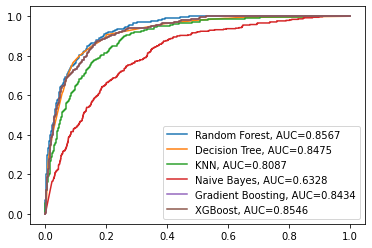

In [ ]:
from sklearn.metrics import roc_curve
plt.figure(0).clf()

# ROC Curve graphs true positive rate against the false positive rate to measure the cost to benefit of achieving the highest possible true positive rate
# The closer the AUC value is to 1, the more likely it is that 100% of predictions are correct.
# AUC values closer to 0 indicate that it's more likely that predictions are incorrect.
# AUC value is used as primary metrics because of class imbalance and because it works well for classification tasks

fpr, tpr, thresholds = roc_curve(Y_test, rf_probs)
plt.plot(fpr, tpr, label="Random Forest, AUC="+str(round(final_auc_rf, 4)))

fpr, tpr, thresholds = roc_curve(Y_test, dt_probs)
plt.plot(fpr, tpr, label="Decision Tree, AUC="+str(round(final_auc_dt, 4)))

fpr, tpr, thresholds = roc_curve(Y_test, knn_probs)
plt.plot(fpr, tpr, label="KNN, AUC="+str(round(final_auc_knn, 4)))

fpr, tpr, thresholds = roc_curve(Y_test, nb_probs)
plt.plot(fpr, tpr, label="Naive Bayes, AUC="+str(round(final_auc_nb,4)))

fpr, tpr, thresholds = roc_curve(Y_test, gb_probs)
plt.plot(fpr, tpr, label="Gradient Boosting, AUC="+str(round(final_auc_gb,4)))

fpr, tpr, thresholds = roc_curve(Y_test, gb_probs)
plt.plot(fpr, tpr, label="XGBoost, AUC="+str(round(final_auc_xgb,4)))


plt.legend()